<a href="https://colab.research.google.com/github/jtracos/Helper/blob/main/ImplementacionJSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import re
import os
import datetime
import pytz
import json

In [9]:
def get_eval(df, f):
  for d in df["dis"]:
    df["amp_obs"] = f(d)

In [10]:
with open("dvdf.txt", mode = "w") as f:
  for valor in [2,3,4,5,6,7]:
    f.write(str(valor) + "\n")

In [ ]:
#forma normal
ar = []
for d in df["dis"]:
  ar.append(f(d))

#comprehension
ar = [f(d) for d in df["dis"]]

def get_eval(df, f):
  df["amp-obs"] = [f(d) for d in df["dis"]]

In [27]:
df = pd.DataFrame({"da":[1,2,3],
                   "ca":[2,4,5],
                   "aa":[3,4,5]})
df1 = pd.DataFrame({"da":[3,2,1],
                   "ca":[2,23,100],
                   "aa":[13,44,51]})
df1.head()

,da,ca,aa
0,3,2,13
1,2,23,44
2,1,100,51


In [ ]:
#principios
dic_vals = df[["aa","ca"]].to_dict()
dic1_vals = df1[["aa","ca"]].to_dict()

final = {
    "file1": dic_vals,
    "file2": dic1_vals
}

with open("variables.json", mode = "w") as file:
  json.dump(final, file)


In [36]:
a = np.array([2,3,4,5])
with open("numpy2json.json", mode = "w") as file:
  json.dump(a.tolist() , file)

In [41]:
#mejoras
final = {}

def add_valor(nombre_campo, df):
  final[nombre_campo] = df[["aa", "ca"]].to_dict()


def guardar_datos(file_name, diccionario):
  with open(file_name, mode = "w") as file:
    json.dump(diccionario, file)

In [43]:
add_valor("tabla1", df)

In [44]:
final

{'valores1': {'aa': {0: 3, 1: 4, 2: 5}, 'ca': {0: 2, 1: 4, 2: 5}}}

In [46]:
add_valor("tabla2", df1)
final

{'valores1': {'aa': {0: 3, 1: 4, 2: 5}, 'ca': {0: 2, 1: 4, 2: 5}},
 'valores2': {'aa': {0: 13, 1: 44, 2: 51}, 'ca': {0: 2, 1: 23, 2: 100}}}

In [47]:
guardar_datos("variables.json", final)

In [51]:
rewind =json.load(open("variables.json"))

In [53]:
rewind.keys()

dict_keys(['valores1', 'valores2'])

In [54]:
pd.DataFrame(rewind["valores1"])

,aa,ca
0,3,2
1,4,4
2,5,5


# Parte 2

In [ ]:
files = os.listdir("/content/")
print(files)
fileidx = int(input("Indique el indice del archivo: "))
file = files[fileidx]
print(file)

['.config', 'DistAzim-corregidos.csv', 'BAHB.20090803_215819.BHZ.ascii', 'PLIB.20090803_215819.BHZ.ascii', 'sample_data']
Indique el indice del archivo: 3
PLIB.20090803_215819.BHZ.ascii


In [ ]:
f = open(file)
tmpfile = f.read()
f.close()
#XX_PLIB_MHZ
exp = re.findall("XX_[A-Z]{4}__[A-Z]{3}_", tmpfile)

In [ ]:
exp

['XX_PLIB__MHZ_']

In [ ]:
aux = exp[0].replace(re.findall("_[A-Z]{3}_", exp[0])[0], "_01_001_")

In [ ]:
tmpfile = tmpfile.replace(re.findall("XX_[A-Z]{4}__[A-Z]{3}_", tmpfile)[0], aux)

In [ ]:
with open(file, mode = "w") as f:
  f.write(tmpfile)


In [ ]:
#Con expresiones regulares
def select_file(path):
  """Funcion para seleccionar el archivo"""
  files = os.listdir(path)
  print(files)
  fileidx = int(input("Indique el indice del archivo: "))
  return files[fileidx]




def set_colname(file, regex = "XX_[A-Z]{4}__[A-Z]{3}_"):

  with open(file) as f:
    #Extraemos el texto
    tmpfile = f.read()
  #encontrar el nombre de la columna con regex
  wrong = re.findall(regex, tmpfile)
  #reemplazamos la parte incorrecta y ajustamos el nombre correctamente
  nombre = wrong[0].replace(re.findall("_[A-Z]{3}_", wrong[0])[0], "_01_001_")

  return tmpfile.replace(wrong[0], nombre)



#path = "C:/User/MiAmor/Carpeta"

def apply_all(path, regex = "XX_[A-Z]{4}__[A-Z]{3}_"):
  """Funcion para aplicar las funciones"""
  file = select_file(path)
  abs_path = os.path.join(path, file)
  renamed = set_colname(abs_path, regex = regex)
  #return rename
  with open(abs_path, mode = "w" ) as f:
    f.write(renamed)

In [ ]:
file  = select_file("/content/")
file

['.config', 'DistAzim-corregidos.csv', 'BAHB.20090803_215819.BHZ.ascii', 'PLIB.20090803_215819.BHZ.ascii', '.ipynb_checkpoints', 'sample_data']
Indique el indice del archivo: 3


'PLIB.20090803_215819.BHZ.ascii'

In [ ]:
set_colname(file)

'TIMESERIES XX_PLIB__01_001_, 14401 samples, 20 sps, 2009-08-03T21:57:26.250000, TSPAIR, FLOAT, \n2009-08-03T21:57:26.250000  -1.6519e-06\n2009-08-03T21:57:26.300000  -1.8891e-06\n2009-08-03T21:57:26.350000  -1.8251e-06\n2009-08-03T21:57:26.400000  -1.8494e-06\n2009-08-03T21:57:26.450000  -1.9450e-06\n2009-08-03T21:57:26.500000  -1.6703e-06\n2009-08-03T21:57:26.550000  -1.7164e-06\n2009-08-03T21:57:26.600000  -1.6869e-06\n2009-08-03T21:57:26.650000  -1.6716e-06\n2009-08-03T21:57:26.700000  -1.7074e-06\n2009-08-03T21:57:26.750000  -1.5654e-06\n2009-08-03T21:57:26.800000  -1.3892e-06\n2009-08-03T21:57:26.850000  -1.3781e-06\n2009-08-03T21:57:26.900000  -1.4276e-06\n2009-08-03T21:57:26.950000  -1.3879e-06\n2009-08-03T21:57:27.000000  -1.3658e-06\n2009-08-03T21:57:27.050000  -1.2843e-06\n2009-08-03T21:57:27.100000  -1.4033e-06\n2009-08-03T21:57:27.150000  -1.3538e-06\n2009-08-03T21:57:27.200000  -1.2562e-06\n2009-08-03T21:57:27.250000  -1.2796e-06\n2009-08-03T21:57:27.300000  -1.2587e-06\n

In [ ]:
apply_all("/content/")

['.config', 'DistAzim-corregidos.csv', 'BAHB.20090803_215819.BHZ.ascii', 'PLIB.20090803_215819.BHZ.ascii', '.ipynb_checkpoints', 'sample_data']
Indique el indice del archivo: 3


In [ ]:
#Sin expresiones regulares
def select_file(path):
  """Funcion para seleccionar el archivo"""
  files = os.listdir(path)
  print(files)
  fileidx = int(input("Indique el indice del archivo: "))
  return files[fileidx]




def set_colname(file):

  with open(file) as f:
    #Extraemos el texto
    tmpfile = f.read()
  #encontrar el nombre de la columna con regex
  print(tmpfile)
  wrong = input("Ingrese caracteres a cambiar: ")
  #reemplazamos la parte incorrecta y ajustamos el nombre correctamente
  nombre = input("Ingrese caracteres sustitutos: ")

  return tmpfile.replace(wrong, nombre)



#path = "C:/User/MiAmor/Carpeta"

def apply_all(path):
  """Funcion para aplicar las funciones"""
  file = select_file(path)
  abs_path = os.path.join(path, file)
  renamed = set_colname(abs_path)
  #return rename
  with open(abs_path, mode = "w" ) as f:
    f.write(renamed)

In [ ]:
path = "C:/ruta/a/carpetas"
folders = os.listdir(path) #lista las carpetas
for folder in folders:
  ruta = os.listdir(os.path.join(path, folder))
  if os.path.isdir(ruta): #si es una carpeta, revisa los archivos
    files = os.listdir(ruta)
    for file in files:
      try:# este bloque evita que de error si puede abrir el archivo
        with open(os.path.join(ruta, file)) as f:
            print(f.readline(1))#abre el archivo y muestra la primer liena
        ev = int(input("Modificar archivo?: 1= SI"))
        if ev == 1:
        text = set_colname(os.path.join(ruta, file)) # si es un archivo requerido, 
        #                                              lo modifica
        with open(os.path.join(ruta, file), mode = "w") as f:
          f.write(text)# escribe el archivo
        except:
          pass

In [ ]:
form ="""PLIB.20090803_215552.BHZ.ascii #nombre del sismograma de componente Vertical (Z). Los cuales ya han sido generados.
101.20	#profundidad del evento 
57.978 67.978 #inicio de la ventana de tiempo( Guardada en una variable)
plibz-ev871.txt  #nombre de salida del archivo
6
SLGB.20090803_215552.BHZ.ascii
65.69
58.018 64.018
slgbz-ev871.txt
0"""

In [ ]:
form1 ="""{file_name}
{profundidad} 
{ventana[0]} {ventana[1]}
{nombre_output}
{fin}""".format(file_name = "PLIB.20090803_215552.BHZ.ascii",
                profundidad = 101.20,
                ventana = (57.978, 67.978), 
                nombre_output = "slgbz-ev871.txt",
                fin = 0)
print(form1)

PLIB.20090803_215552.BHZ.ascii
101.2 
57.978 67.978
slgbz-ev871.txt
0


# Parte 3

In [ ]:
#context manager
with open("bahbz-ev1293.txt") as file:
  lines = file.readlines()


In [ ]:
def get_string(file):
  with open(file) as f:
    lines = f.readlines()
  
  idx = [idx for idx, line in enumerate(lines) if "10.0" in line][0]#ubicar donde 10.0
  string = "".join(lines[:idx+1])
  
  with open(file, mode = "w") as f:
    f.write(string)
    return string


print(get_string("bahbz-ev1293.txt"))

In [ ]:
def test(fn, **kwargs):
  for _ in kwargs:
    fn(_)

In [ ]:
test(print, file = "doc.txt", file1 = "doc3.txt")

file
file1


In [ ]:
path = os.path.join("/mnt","sdcard")
path

'/mnt/sdcard'

In [ ]:
type(path)

str

In [ ]:
import os
import pathlib

def remove_lines(folder, file, patterns =["*", "-"]):
    """Remueve las lineas que contienen patrones listados y reescribe el archivo
    original.
    
    Argumentos:
    -------------------------------------------------------------
        folder<String>: Ruta absoluta a la carpeta que contiene el archivo
        file<String>: Nombre del archivo a filtrar
        patterns<List>: Caracteres que contienen las lineas a ser removidas
    
    Returns:
    ----------------------------------------------------------------
        True, si el archivo puede editarse
        False, si no es un archivo editable
    """
    absolute = os.path.join(folder,file)
    file = pathlib.Path(absolute)
    if file.is_file():
        with open(absolute, mode="r") as f:
            lines = f.read()
        
        filtered = []
        for line in lines:
            aux = 0
            for pattern in patterns:
                if pattern in line:
                    aux +=1
            if aux == 0:
                filtered.append(line)
        
        res = "".join(filtered)
        g = open(absolute, mode="w")
        g.write(res)
        g.close()
        return True
    return False

In [ ]:
f = open("/content/doc.txt")
f.readlines()

['fag\n',
 'fddfd,sgg\n',
 'fdds\n',
 'faed.\n',
 'avsfbdb\n',
 'vsbf\n',
 'sdvs\n',
 ' f\n',
 'dvv\n',
 'dvsdv,\n',
 'avddsb\n',
 'vbbab\n',
 'dvsdvdvsv\n',
 'dcbf,4546\n',
 'dsdg,\n',
 'fesf,']

Text(0.5, 1.0, '$\\mathbf{Intento 1}$')

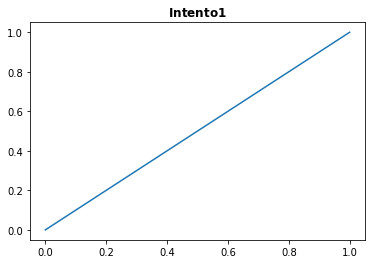

In [ ]:
import matplotlib
#matplotlib.rc("text", usetex = True)
plt.plot([0,1], [0,1])
plt.title("$\mathbf{Intento 1}$")